In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\sriva\deeplearning\bankturn_over_dataset\excel\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.dtypes


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
606,699,France,Male,53,4,0.00,2,0,1,111307.98,0
1842,745,Spain,Female,35,8,0.00,2,1,1,116581.10,0
7453,778,Germany,Female,35,1,151958.19,3,1,1,131238.37,1
8860,808,France,Male,24,4,122168.65,1,1,0,174107.04,0


In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.Geography.values

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [8]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [9]:
df.shape

(10000, 11)

In [10]:
tenure_exited_zero=df[df.Exited==0].Tenure
tenure_exited_one=df[df.Exited==1].Tenure


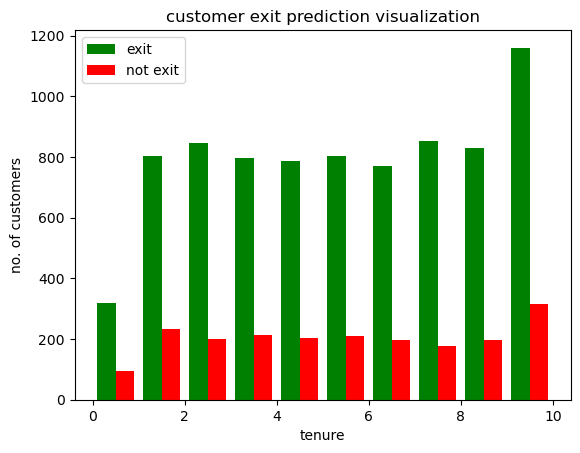

In [11]:
plt.hist([tenure_exited_zero,tenure_exited_one],color=['green','red'],label=['exit','not exit'])
plt.xlabel('tenure')
plt.ylabel('no. of customers')
plt.title('customer exit prediction visualization')
plt.legend()

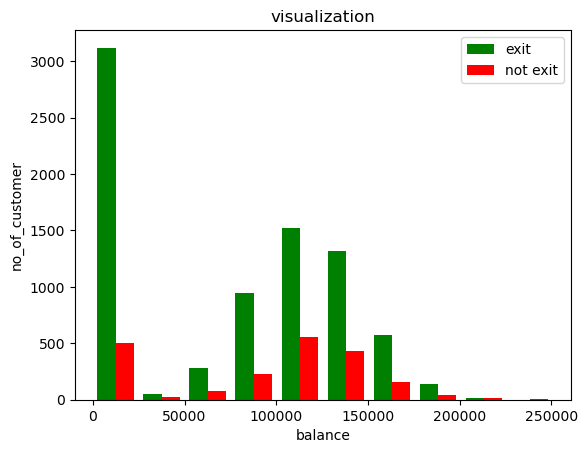

In [12]:
balance_exited_zero=df[df.Exited==0].Balance
balance_exited_one=df[df.Exited==1].Balance
plt.hist([balance_exited_zero,balance_exited_one],color=['green','red'],label=['exit','not exit'])
plt.xlabel('balance')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

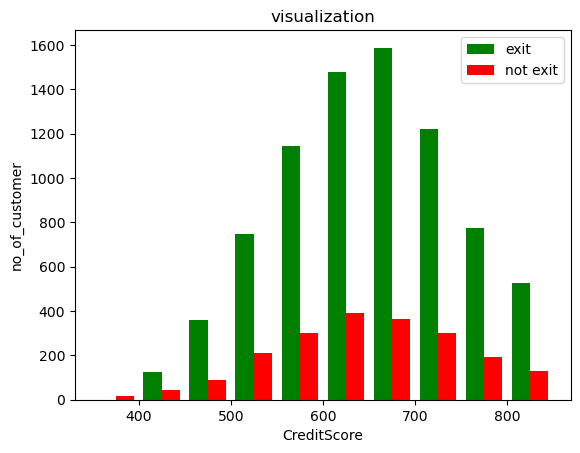

In [13]:
CreditScore_exited_zero=df[df.Exited==0].CreditScore
CreditScoree_exited_one=df[df.Exited==1].CreditScore
plt.hist([CreditScore_exited_zero,CreditScoree_exited_one],color=['green','red'],label=['exit','not exit'])
plt.xlabel('CreditScore')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

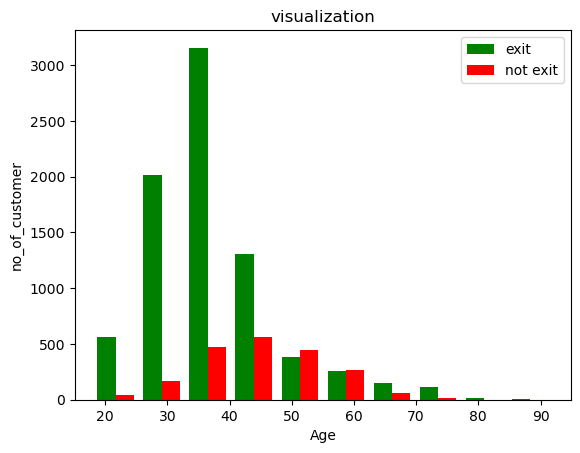

In [14]:
Age_exited_zero=df[df.Exited==0].Age
Age_exited_one=df[df.Exited==1].Age
plt.hist([Age_exited_zero,Age_exited_one],color=['green','red'],label=['exit','not exit'])
plt.xlabel('Age')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

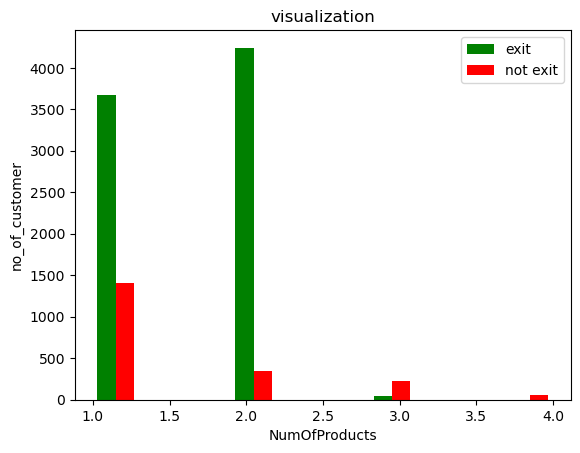

In [15]:
NumOfProducts_exited_zero=df[df.Exited==0].NumOfProducts
NumOfProducts_exited_one=df[df.Exited==1].NumOfProducts
plt.hist([NumOfProducts_exited_zero,NumOfProducts_exited_one],color=['green','red'],label=['exit','not exit'])
plt.xlabel('NumOfProducts')
plt.ylabel('no_of_customer')
plt.title("visualization")
plt.legend()

In [16]:
def unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [17]:
unique_col_values(df)

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']


In [18]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [21]:
df1=pd.get_dummies(data=df,columns=['Geography'])
df1.head()
df1.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [22]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [23]:
col_to_scale=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[col_to_scale]=scaler.fit_transform(df[col_to_scale])

In [24]:
df1.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3111,0.546,0,0.324324,0.1,0.595192,2,1,0,0.504161,0,0,1,0
7051,0.586,0,0.337838,0.1,0.000000,2,1,1,0.728834,0,0,0,1
8097,0.552,1,0.459459,0.0,0.000000,2,1,0,0.160755,1,1,0,0


In [28]:
X=df1.drop('Exited', axis='columns')
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,1,1,1,0.506735,1,0,0
1,0.516,1,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,1,0.324324,0.8,0.636357,3,1,0,0.569654,1,0,0
3,0.698,1,0.283784,0.1,0.000000,2,0,0,0.469120,1,0,0
4,1.000,1,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,1


In [29]:
y=df1.Exited

In [30]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [34]:
len(X_train)

8000

In [40]:
X_train[0:5].shape

(5, 12)

In [36]:
len(X_test)

2000

In [37]:
X_train.shape

(8000, 12)

In [41]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
     keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7188
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.7968
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.8024
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.8075
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8156
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8213
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8290
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8359
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8390
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3673 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8645
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8654
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8670
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8644
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8655
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8658
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8650
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8651
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.8655
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 

In [42]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8540


[0.3508482277393341, 0.8539999723434448]

In [43]:
yp=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [44]:
yp[0:4]

array([[0.03284118],
       [0.07030898],
       [0.08966448],
       [0.12704496]], dtype=float32)

In [46]:
y_predicted=[]
for i in yp:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)


In [48]:
y_predicted[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [49]:
y_test[0:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

Text(95.72222222222221, 0.5, 'Truth')

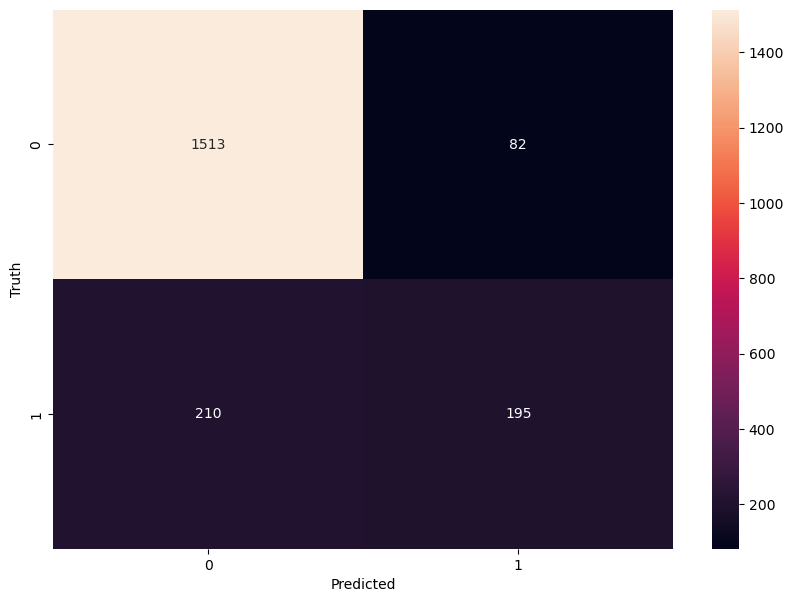

In [52]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')